### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.

## PART B - CLASSIFICATION

### Preprocessing of the data

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import mglearn as mg 

import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#We are importing data here 
sample_data = pd.read_csv('messidor.csv', header = 0)

In [3]:
# We are checking the first 5 rows of the dataset
sample_data.head()

,id,quality assessment,pre_screening,MA_0.5,MA_0.6,MA_0.7,MA_0.8,MA_0.9,MA_1.0,MA_0.5P,...,MA_0.7P,MA_0.8P,MA_0.9P,MA_1.0.1,MA_1.1,MA_1.2,euclidean distance,diameter of the optic,AM/FM,Class
0,1,1,1,22,22,22,19,18,14,49.895756,...,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,2,1,1,24,24,22,18,16,13,57.709936,...,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,3,1,1,62,60,59,54,47,33,55.831441,...,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,4,1,1,55,53,53,50,43,31,40.467228,...,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,5,1,1,44,44,44,41,39,27,18.026254,...,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [4]:
# We understand the number of instances and attributes in the dataset
sample_data.shape

(1151, 21)

In [5]:
# We are checking the number of missing values in the dataset
sample_data.isnull().sum()

id                       0
quality assessment       0
pre_screening            0
MA_0.5                   0
MA_0.6                   0
MA_0.7                   0
MA_0.8                   0
MA_0.9                   0
MA_1.0                   0
MA_0.5P                  0
MA_0.6P                  0
MA_0.7P                  0
MA_0.8P                  0
MA_0.9P                  0
MA_1.0.1                 0
MA_1.1                   0
MA_1.2                   0
euclidean distance       0
diameter of the optic    0
AM/FM                    0
Class                    0
dtype: int64

In [6]:
#Another method of checking the missing values in the dataset it also checks the data types of the columns in the dataset  
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1151 non-null   int64  
 1   quality assessment     1151 non-null   int64  
 2   pre_screening          1151 non-null   int64  
 3   MA_0.5                 1151 non-null   int64  
 4   MA_0.6                 1151 non-null   int64  
 5   MA_0.7                 1151 non-null   int64  
 6   MA_0.8                 1151 non-null   int64  
 7   MA_0.9                 1151 non-null   int64  
 8   MA_1.0                 1151 non-null   int64  
 9   MA_0.5P                1151 non-null   float64
 10  MA_0.6P                1151 non-null   float64
 11  MA_0.7P                1151 non-null   float64
 12  MA_0.8P                1151 non-null   float64
 13  MA_0.9P                1151 non-null   float64
 14  MA_1.0.1               1151 non-null   float64
 15  MA_1

In [7]:
#outputing the descriptive statistics of the dataset
sample_data.describe()

,id,quality assessment,pre_screening,MA_0.5,MA_0.6,MA_0.7,MA_0.8,MA_0.9,MA_1.0,MA_0.5P,...,MA_0.7P,MA_0.8P,MA_0.9P,MA_1.0.1,MA_1.1,MA_1.2,euclidean distance,diameter of the optic,AM/FM,Class
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,...,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,576.000000,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,...,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,332.409386,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,...,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,288.500000,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,...,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,576.000000,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,...,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,863.500000,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,...,11.766880,1.921649,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1151.000000,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,...,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


In [8]:
# checking the range of values in the Class column
sample_data['Class'].value_counts()

1    611
0    540
Name: Class, dtype: int64

In [9]:
#checking the range of values in the Class column
sample_data['Class'].value_counts()

1    611
0    540
Name: Class, dtype: int64

In [10]:
#imputing the mean value of the column for the missing rows
sample_data['MA_0.5'] = sample_data.groupby(['Class']) ['MA_0.5'].apply(lambda x:x.fillna(x.mean()))
sample_data['MA_0.9'] = sample_data.groupby('Class') ['MA_0.9'].apply(lambda x:x.fillna(x.mean()))
sample_data['MA_0.9P'] = sample_data.groupby('Class') ['MA_0.9P'].apply(lambda x:x.fillna(x.mean()))
sample_data['MA_1.0'] = sample_data.groupby('Class') ['MA_1.0'].apply(lambda x:x.fillna(x.mean()))
sample_data['MA_1.2']= sample_data.groupby('Class') ['MA_1.2'].apply(lambda x:x.fillna(x.mean()))
sample_data['diameter of the optic']= sample_data.groupby('Class') ['diameter of the optic'].apply(lambda x:x.fillna(x.mean()))

In [11]:
#We are again checking the number of missing values in the dataset
sample_data.isnull().sum()

id                       0
quality assessment       0
pre_screening            0
MA_0.5                   0
MA_0.6                   0
MA_0.7                   0
MA_0.8                   0
MA_0.9                   0
MA_1.0                   0
MA_0.5P                  0
MA_0.6P                  0
MA_0.7P                  0
MA_0.8P                  0
MA_0.9P                  0
MA_1.0.1                 0
MA_1.1                   0
MA_1.2                   0
euclidean distance       0
diameter of the optic    0
AM/FM                    0
Class                    0
dtype: int64

In [12]:
#checking the correlation between Class, which is our target variable and all attributes
sample_data.corr()['Class']

id                      -0.024825
quality assessment       0.062816
pre_screening           -0.076925
MA_0.5                   0.292603
MA_0.6                   0.266338
MA_0.7                   0.234691
MA_0.8                   0.197511
MA_0.9                   0.161631
MA_1.0                   0.127861
MA_0.5P                  0.058015
MA_0.6P                  0.000479
MA_0.7P                  0.038281
MA_0.8P                  0.104254
MA_0.9P                  0.142273
MA_1.0.1                 0.151424
MA_1.1                   0.184772
MA_1.2                   0.177313
euclidean distance       0.008466
diameter of the optic   -0.030868
AM/FM                   -0.042144
Class                    1.000000
Name: Class, dtype: float64

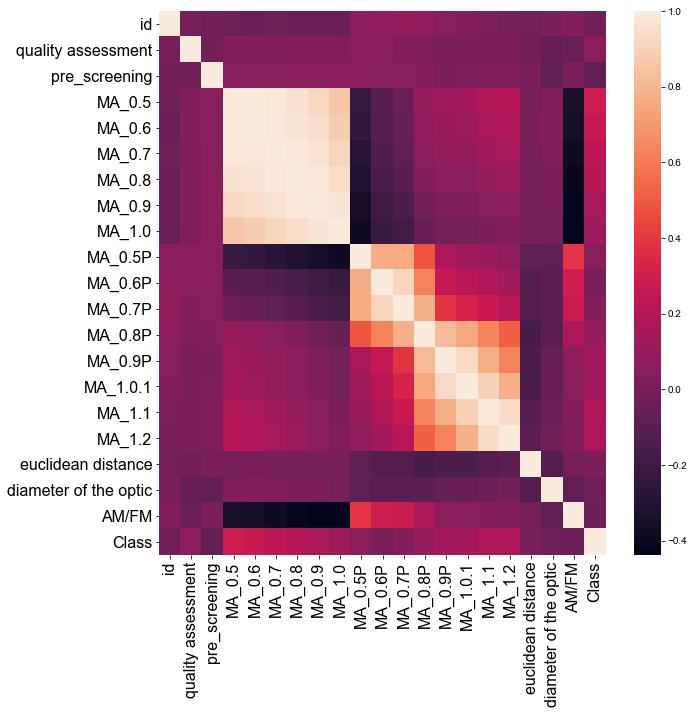

In [13]:
#constructing a heat map to check the correlation between all the variables

import matplotlib.pyplot as plt
import mglearn as mg 
import seaborn as sns
plt.figure(figsize=(10,10))
plt.tick_params(axis='both',labelsize=16)
sns.heatmap(sample_data.corr())
sns.set(style="darkgrid")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF13702948>,
      dtype=object)

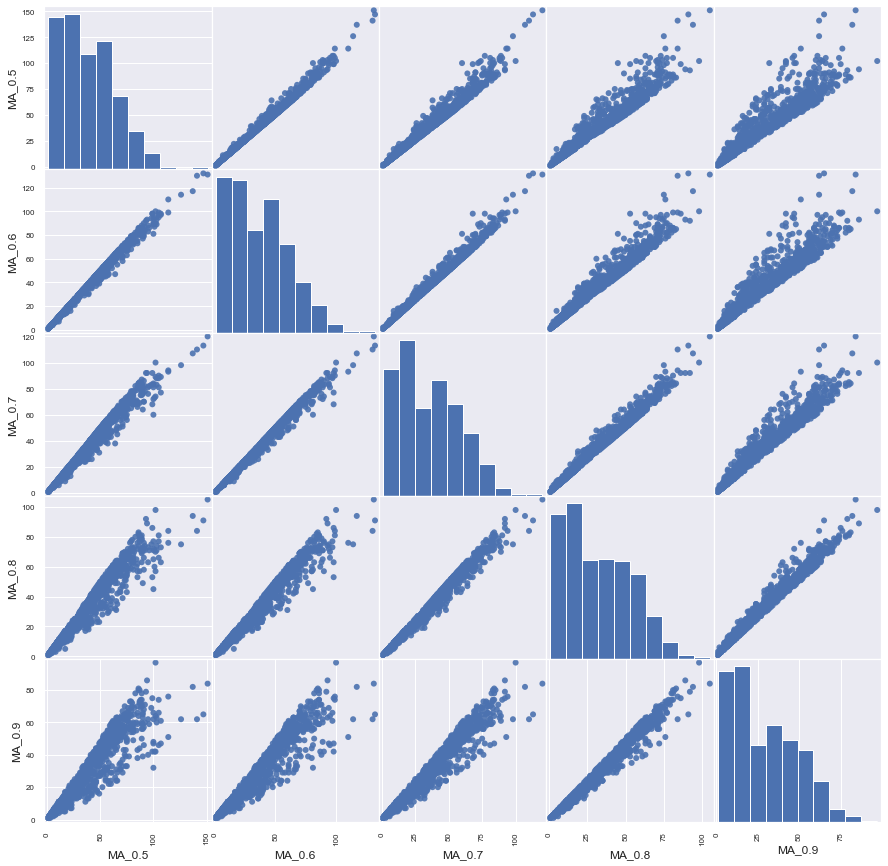

In [14]:
# We are generating a scatter plot for each MA detection result against the target variable Class

from pandas.plotting import scatter_matrix
X = sample_data[['quality assessment', 'pre_screening', 'MA_0.5', 'MA_0.6', 'MA_0.7', 'MA_0.8', 'MA_0.9', 'MA_1.0', 'MA_0.5P', 'MA_0.6P', 'MA_0.7P', 'MA_0.8P', 'MA_0.9P', 'MA_1.0', 'MA_1.1', 'MA_1.2', 'euclidean distance', 'diameter of the optic', 'AM/FM']]
y = sample_data['Class']
attributes = X.columns[2:7]
scatter_matrix(X[attributes], figsize = (15,15), alpha = 0.9, marker = 'O')

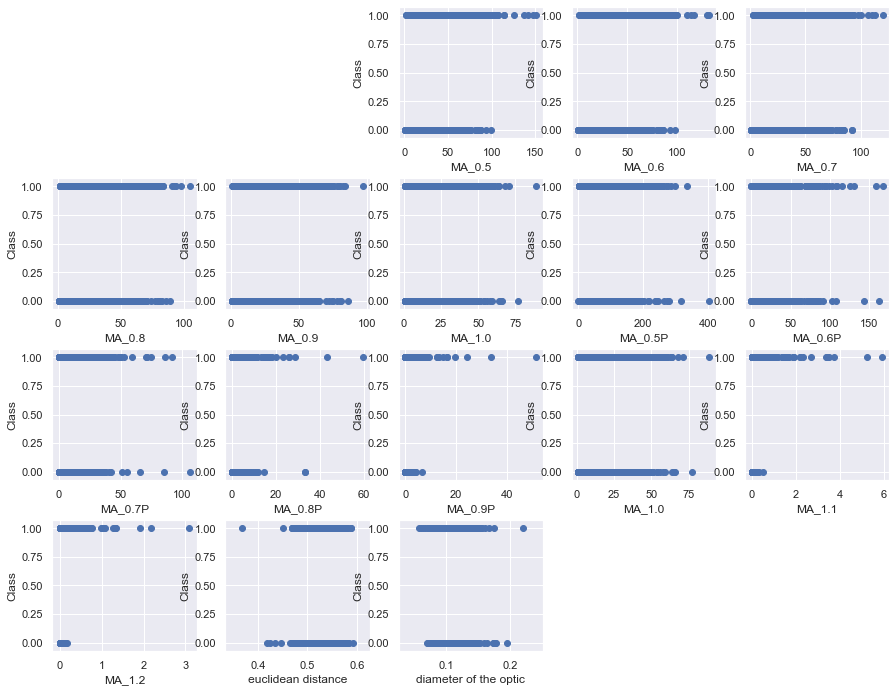

In [15]:
# generating an individual scatter plot for all variable against target variable Class

fig = plt.figure(figsize = (15,15))

columns = 5
rows = 5

for i in range(3, 19):
    if(i < 19):
        fig.add_subplot(rows, columns, i)
        plt.scatter(x = X.columns[i - 1], y= 'Class', data = sample_data)
        plt.xlabel(X.columns[i - 1])
        plt.ylabel('Class')
        plt.subplots_adjust(hspace = 0.30)
    else:
        break

plt.show()

In [16]:
#splitting the data into training set and test set  
#scaling the training set and test set, test size is 25

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = sample_data[['quality assessment', 'pre_screening', 'MA_0.5', 'MA_0.6', 'MA_0.7', 'MA_0.8', 'MA_0.9', 'MA_1.0', 'MA_0.5P', 'MA_0.6P', 'MA_0.7P', 'MA_0.8P', 'MA_0.9P', 'MA_1.0', 'MA_1.1', 'MA_1.2', 'euclidean distance', 'diameter of the optic', 'AM/FM']]
y = sample_data['Class']

X_train_org, X_test_org, y_train, y_test = train_test_split (X, y, test_size= 0.25, random_state = 1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [17]:
#defining the score function which help display the classification report
#and confusion matrix for the appropriate models

from sklearn.metrics import classification_report, confusion_matrix

def score_func(y, y_pred):
    a=[]
    b=[]
    a.append('confusion_matrix')
    b.append(confusion_matrix(y, y_pred))
    a.append('classification_report')
    b.append(classification_report(y,y_pred))
    print(classification_report(y,y_pred))
    #return pd.DataFrame(b, a)

## 1. Applying the Voting Classifiers - Hard and Soft Voting

### 1 a) Voting Classifiers - Hard Voting 

In [18]:
# running the hard voting classifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(C = 0.001, penalty = 'l2')
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(13)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 0.001, kernel = 'rbf', gamma = 0.001,probability = True)
svm_clf.fit(X_train, y_train)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    score_func(y_test, y_pred)

LogisticRegression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.52      1.00      0.68       149

    accuracy                           0.52       288
   macro avg       0.26      0.50      0.34       288
weighted avg       0.27      0.52      0.35       288

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       139
           1       0.68      0.63      0.65       149

    accuracy                           0.65       288
   macro avg       0.65      0.65      0.65       288
weighted avg       0.65      0.65      0.65       288

SVC
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.52      1.00      0.68       149

    accuracy                           0.52       288
   macro avg       0.26      0.50      0.34       288
weighted avg       0.27      0

### 1 c) Voting Classifiers - Soft Voting 

In [19]:
# running the hard voting classifier 

log_clf = LogisticRegression(C = 0.001, penalty = 'l2')
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(13)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 0.001, kernel = 'rbf', gamma = 0.001,probability = True)
svm_clf.fit(X_train, y_train)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    score_func(y_test, y_pred)

LogisticRegression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.52      1.00      0.68       149

    accuracy                           0.52       288
   macro avg       0.26      0.50      0.34       288
weighted avg       0.27      0.52      0.35       288

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       139
           1       0.68      0.63      0.65       149

    accuracy                           0.65       288
   macro avg       0.65      0.65      0.65       288
weighted avg       0.65      0.65      0.65       288

SVC
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.52      1.00      0.68       149

    accuracy                           0.52       288
   macro avg       0.26      0.50      0.34       288
weighted avg       0.27      0

## 2. Applying two models with Bagging & Pasting

### 2 a) Bagging - Model 1 (Decision Tree)

In [20]:
#calculating the best estimator

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

p_test3 = {'n_estimators':[200,500,700,900,1000]}
dt_clf = DecisionTreeClassifier(random_state=1,max_depth = 15)
bag_clf = BaggingClassifier(dt_clf, max_samples=100, bootstrap=True, n_jobs=-1, random_state=1)

tuning = GridSearchCV(estimator =bag_clf,param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
print("Best Parameter: {}".format(tuning.best_params_))
print("Highest CrossVal score: {:.2f}".format(tuning.best_score_))

Best Parameter: {'n_estimators': 900}
Highest CrossVal score: 0.68


In [21]:
#generating the train and the test score for the best parameter value

dt_clf = DecisionTreeClassifier(random_state = 1, max_depth = 15)
bag_clf = BaggingClassifier(dt_clf, n_estimators = 700, max_samples = 100, bootstrap = True, n_jobs=-1, random_state=1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.80
Test score: 0.66


In [22]:
#calling out the score function

score_func(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.65      0.66      0.65       139
           1       0.68      0.66      0.67       149

    accuracy                           0.66       288
   macro avg       0.66      0.66      0.66       288
weighted avg       0.66      0.66      0.66       288



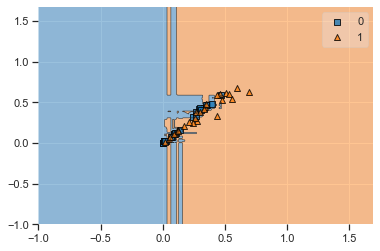

In [23]:
  
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_b = X_train[100:150,[2,5]]
y_b = y_train[100:150]
dt_clf = DecisionTreeClassifier(random_state=1,max_depth = 15)
bag_clf = BaggingClassifier(dt_clf, n_estimators=700, max_samples=35, bootstrap=True, n_jobs=-1, random_state=1)

bag_clf.fit(X_b, y_b) 

plot_decision_regions(X_b,y_b.values, clf=bag_clf)

plt.show()


### 2 b) Bagging - Model 2 (Random Forest)

In [24]:
#using grid search cv to generate the best parameter value for 
#no of estimators hyper parameter

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

p_test3 = {'n_estimators':[200,500,700,900,1000]}
tuning = GridSearchCV(estimator =RandomForestClassifier(max_leaf_nodes=15, bootstrap=False, n_jobs=-1, random_state=1),
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
print("Best Parameter: {}".format(tuning.best_params_))
print("Highest CrossVal score: {:.2f}".format(tuning.best_score_))

Best Parameter: {'n_estimators': 500}
Highest CrossVal score: 0.68


In [25]:
#using the best value for number of estimators hyper parameter to derive the best value
#for max leaf nodes hyper parameter

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

p_test3 = {'max_leaf_nodes':[2, 4, 5, 7, 9, 10, 12, 15, 20, 40, 60]}
tuning = GridSearchCV(estimator = RandomForestClassifier(n_estimators = 500, bootstrap = False, n_jobs = -1, random_state = 1),
            param_grid = p_test3, scoring = 'accuracy',n_jobs = 4, iid = False, cv = 5)
tuning.fit(X_train,y_train)
print("Best Parameter: {}".format(tuning.best_params_))
print("Highest CrossVal score: {:.2f}".format(tuning.best_score_))

Best Parameter: {'max_leaf_nodes': 20}
Highest CrossVal score: 0.68


In [26]:
#generating the train and the test score for the best parameter value

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 40, bootstrap = True, n_jobs=-1, random_state = 1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.889
Accuracy on test set: 0.660


In [27]:
#calling out the score function

score_func(y_test, forest.predict(X_test))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       139
           1       0.66      0.69      0.68       149

    accuracy                           0.66       288
   macro avg       0.66      0.66      0.66       288
weighted avg       0.66      0.66      0.66       288



### 2 c) Pasting - Model 1 (Decision Tree)

In [28]:
#calculating the best estimator

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

p_test3 = {'n_estimators':[200,500,700,900,1000]}
dt_clf = DecisionTreeClassifier(random_state=1,max_depth = 15)
bag_clf = BaggingClassifier(dt_clf, max_samples=100, bootstrap=False, n_jobs=-1, random_state=1)

tuning = GridSearchCV(estimator =bag_clf,param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
print("Best Parameter: {}".format(tuning.best_params_))
print("Highest CrossVal score: {:.2f}".format(tuning.best_score_))

Best Parameter: {'n_estimators': 1000}
Highest CrossVal score: 0.69


In [29]:
#generating the train and the test score for the best parameter value

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=1,max_depth = 15)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.80
Test score: 0.66


In [30]:
#calling out the score function

score_func(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.64      0.65      0.65       139
           1       0.67      0.66      0.67       149

    accuracy                           0.66       288
   macro avg       0.66      0.66      0.66       288
weighted avg       0.66      0.66      0.66       288



### 2 d) Pasting - Model 2 (Random Forest)

In [31]:
#using GridSearchCv to generate the best parameter value for 
#no of estimators hyper parameter

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

p_test3 = {'n_estimators':[200, 500, 700, 900, 1000]}
tuning = GridSearchCV(estimator =RandomForestClassifier(max_leaf_nodes=15, bootstrap=False, n_jobs=-1, random_state=1),
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
print("Best Parameter: {}".format(tuning.best_params_))
print("Highest CrossVal score: {:.2f}".format(tuning.best_score_))

Best Parameter: {'n_estimators': 500}
Highest CrossVal score: 0.68


In [32]:
#using the best value for number of estimators hyper parameter to derive the best value
#for max leaf nodes hyper parameter

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

p_test3 = {'max_leaf_nodes':[2,4,5,7,9,10,12,15,20,40,60]}
tuning = GridSearchCV(estimator =RandomForestClassifier(n_estimators = 500, bootstrap = False, n_jobs=-1, random_state = 1),
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
print("Best Parameter: {}".format(tuning.best_params_))
print("Highest CrossVal score: {:.2f}".format(tuning.best_score_))

Best Parameter: {'max_leaf_nodes': 20}
Highest CrossVal score: 0.68


In [33]:
#generating the train and the test score for the best parameter value

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500,max_leaf_nodes=40, bootstrap=False, n_jobs=-1, random_state=1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.888
Accuracy on test set: 0.660


In [34]:
#calling out the score function

score_func(y_test, forest.predict(X_test))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63       139
           1       0.66      0.70      0.68       149

    accuracy                           0.66       288
   macro avg       0.66      0.66      0.66       288
weighted avg       0.66      0.66      0.66       288



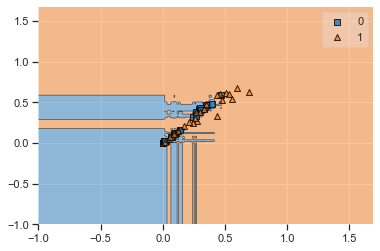

In [35]:
#generating the visualization for pasting - model 2

X_b = X_train[100:150,[2,5]]
y_b = y_train[100:150]
forest = RandomForestClassifier(n_estimators=500, bootstrap=True, n_jobs=-1, random_state=1)
forest.fit(X_b, y_b) 
plot_decision_regions(X_b, y_b.values, clf=forest)

## 3. Applying two models with AdaBoosting

### 3 a) AdaBoosting - Model 1 (Decision Tree)

In [36]:
#using grid search cv to generate the best parameter value for 
#no of estimators hyper parameter

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

p_test3 = {'n_estimators':[200, 500]}
dt_clf = DecisionTreeClassifier(random_state = 1, max_depth = 1)
tuning = GridSearchCV(estimator = AdaBoostClassifier( dt_clf,algorithm="SAMME.R", random_state=1),
            param_grid = p_test3, scoring = 'accuracy',n_jobs = 4, iid = False, cv = 5)
tuning.fit(X_train,y_train)

print("Best Parameter: {}".format(tuning.best_params_))
print("Highest CrossVal score: {:.2f}".format(tuning.best_score_))

Best Parameter: {'n_estimators': 500}
Highest CrossVal score: 0.70


In [37]:
#using grid search cv to generate the best parameter value for 
#learning rate hyper parameter

p_test3 = {'learning_rate':[1.0, 0.1, 0.01]}

dt_clf = DecisionTreeClassifier(random_state = 1, max_depth = 1)
tuning = GridSearchCV(estimator = AdaBoostClassifier(dt_clf, algorithm = "SAMME.R", random_state = 1),
            param_grid = p_test3, scoring = 'accuracy',n_jobs = 4,iid = False, cv = 5)
tuning.fit(X_train,y_train)
print("Best Parameter: {}".format(tuning.best_params_))
print("Highest CrossVal score: {:.2f}".format(tuning.best_score_))

Best Parameter: {'learning_rate': 1.0}
Highest CrossVal score: 0.67


In [38]:
#generating the train and the test score for the best parameter values

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=1,max_depth = 1)
ada_clf = AdaBoostClassifier(dt_clf, n_estimators = 200, algorithm = "SAMME.R", learning_rate = 1.0, random_state = 1)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.90
Test score: 0.69


In [39]:
#calling out the score function

score_func(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       139
           1       0.69      0.74      0.71       149

    accuracy                           0.69       288
   macro avg       0.69      0.69      0.69       288
weighted avg       0.69      0.69      0.69       288



### 3 b) AdaBoosting - Model 2 (SVC with rbf)

In [40]:
#using GridSearchCv to generate the best parameter value for 
#no of estimators hyper parameter

from sklearn.svm import SVC

p_test3 = {'n_estimators':[100,200,500]}
tuning = GridSearchCV(estimator = AdaBoostClassifier( SVC (C = 0.001, kernel = 'rbf', gamma = 0.001,probability=True),algorithm="SAMME.R", random_state=1),
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
print("Best Parameter: {}".format(tuning.best_params_))
print("Highest CrossVal score: {:.2f}".format(tuning.best_score_))

Best Parameter: {'n_estimators': 100}
Highest CrossVal score: 0.54


In [41]:
#using GridSearchCv to generate the best parameter value for 
#learning rate hyper parameter

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

p_test3 = {'learning_rate':[1.0, 0.1, 0.01]}
tuning = GridSearchCV(estimator =AdaBoostClassifier( SVC (C = 0.001, kernel = 'rbf', gamma = 0.001, probability=True), algorithm="SAMME.R", random_state=1),
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
print("Best Parameter: {}".format(tuning.best_params_))
print("Highest CrossVal score: {:.2f}".format(tuning.best_score_))

Best Parameter: {'learning_rate': 0.01}
Highest CrossVal score: 0.61


In [42]:
#generating the train and the test score for the best parameter values

from sklearn.svm import SVC
ada_clf = AdaBoostClassifier( SVC (C = 0.001, kernel = 'rbf', gamma = 0.001,probability=True),n_estimators=100, algorithm="SAMME.R", learning_rate=0.1, random_state=1)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.54
Test score: 0.52


In [43]:
#calling out the score function

score_func(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.52      1.00      0.68       149

    accuracy                           0.52       288
   macro avg       0.26      0.50      0.34       288
weighted avg       0.27      0.52      0.35       288



## 4. Applying one model with Gradient Boosting 

In [44]:
#using GridSearchCV to generate the best parameter value for 
#learning rate hyper parameter

from sklearn.model_selection import GridSearchCV
from  sklearn.ensemble import GradientBoostingClassifier
p_test3 = {'learning_rate':[1.0,0.1,0.01,0.001]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_features='sqrt', random_state=1),
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
print("Best Parameter: {}".format(tuning.best_params_))
print("Highest CrossVal score: {:.2f}".format(tuning.best_score_))

Best Parameter: {'learning_rate': 0.1}
Highest CrossVal score: 0.70


In [45]:
#using GridSearchCV to generate the best parameter value for 
#no of estimators hyper parameter

from sklearn.model_selection import GridSearchCV
p_test3 = {'n_estimators':[100, 500, 1000, 1250, 1500, 1750]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_features = 'sqrt', random_state = 1),
            param_grid = p_test3, scoring = 'accuracy',n_jobs = 4, iid = False, cv = 5)
tuning.fit(X_train,y_train)
print("Best Parameter: {}".format(tuning.best_params_))
print("Highest CrossVal score: {:.2f}".format(tuning.best_score_))

Best Parameter: {'n_estimators': 1000}
Highest CrossVal score: 0.70


In [46]:
#using GridSearchCV to generate the best parameter value for 
#max depth hyper parameter

from sklearn.model_selection import GridSearchCV
p_test3 = {'max_depth':[3, 5, 7, 8, 9, 10, 12, 13, 15]}
tuning = GridSearchCV(estimator = GradientBoostingClassifier(max_features = 'sqrt', random_state = 1),
            param_grid = p_test3, scoring = 'accuracy', n_jobs = 4,iid = False, cv = 5)
tuning.fit(X_train,y_train)
print("Best Parameter: {}".format(tuning.best_params_))
print("Highest CrossVal score: {:.2f}".format(tuning.best_score_))

Best Parameter: {'max_depth': 10}
Highest CrossVal score: 0.70


In [47]:
#generating the train and the test score for the best parameter values

from  sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth = 15, n_estimators = 1250, learning_rate = 0.01, random_state=1)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
print('Train score: {:.2f}'.format(gbrt.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gbrt.score(X_test, y_test)))

Train score: 1.00
Test score: 0.59


In [48]:
#calling out the score function

score_func(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.58      0.56      0.57       139
           1       0.60      0.62      0.61       149

    accuracy                           0.59       288
   macro avg       0.59      0.59      0.59       288
weighted avg       0.59      0.59      0.59       288



## 5. Applying PCA to all the models of Project 1

In [49]:
#defining the score function which helps display the classification report
#and give us the accuracy results

from sklearn.metrics import classification_report, confusion_matrix

def score_func(y, y_pred):
    a=[]
    b=[]
    a.append('confusion_matrix')
    b.append(confusion_matrix(y, y_pred))
    a.append('classification_report')
    b.append(classification_report(y,y_pred))
    print(classification_report(y,y_pred))
    return pd.DataFrame(b, a)

In [50]:
#defining X and y

X = sample_data[['quality assessment', 'pre_screening', 'MA_0.5', 'MA_0.6', 'MA_0.7', 'MA_0.8', 'MA_0.9', 'MA_1.0', 'MA_0.5P', 'MA_0.6P', 'MA_0.7P', 'MA_0.8P', 'MA_0.9P', 'MA_1.0', 'MA_1.1', 'MA_1.2', 'euclidean distance', 'diameter of the optic', 'AM/FM']]
y = sample_data['Class']

### 5 a) KNN Classification with PCA

In [51]:
#running KNN model with pca

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition.pca import PCA
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
pca_alg = PCA(0.95)
X_train = pca_alg.fit_transform(X_train)

X_test = scaler.transform(X_test_org)

X_test = pca_alg.transform(X_test)
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}
grid_search = GridSearchCV (KNeighborsClassifier(), param_grid, cv = 5, return_train_score = True, scoring = 'recall')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 15}
Highest CrossVal score: 0.63


In [52]:
#running cross-validation
from sklearn.model_selection import cross_val_score
score = cross_val_score ( KNeighborsClassifier (n_neighbors = 11), X_train_org, y_train, cv = 5, scoring = 'recall')
print( "Recall CrossVal score: {}".format ( score ))
print( "Avg CrossVal score: {:.2f}".format ( score.mean()))

score = cross_val_score ( KNeighborsClassifier(n_neighbors = 11), X_test_org, y_test, cv = 5, scoring = 'recall')
print( " Recall CrossVal score: {}".format ( score))
print( "Avg CrossVal score: {:.2f}".format ( score.mean()))

Recall CrossVal score: [0.68817204 0.61290323 0.63043478 0.72826087 0.58695652]
Avg CrossVal score: 0.65
 Recall CrossVal score: [0.66666667 0.6        0.56666667 0.56666667 0.44827586]
Avg CrossVal score: 0.57


In [53]:
score = cross_val_score ( KNeighborsClassifier ( n_neighbors = 11), X_train_org, y_train, cv = 5)
print( "Accuracy CrossVal score: {}".format ( score))
print( "Avg CrossVal score: {:.2f}".format ( score.mean()))

score = cross_val_score ( KNeighborsClassifier ( n_neighbors = 11), X_test_org, y_test, cv = 5)
print( "Accuracy CrossVal score: {}".format ( score))
print( "Avg CrossVal score: {:.2f}".format ( score.mean()))

Accuracy CrossVal score: [0.69364162 0.69364162 0.66473988 0.70348837 0.65116279]
Avg CrossVal score: 0.68
Accuracy CrossVal score: [0.70689655 0.63793103 0.5862069  0.68421053 0.57894737]
Avg CrossVal score: 0.64


In [54]:
#displaying the score function

knn = KNeighborsClassifier(n_neighbors = 11).fit(X_train,y_train)
y_pred = knn.predict(pca_alg.transform(scaler.transform(X)))
rt=score_func(y, y_pred)

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       540
           1       0.69      0.66      0.68       611

    accuracy                           0.66      1151
   macro avg       0.66      0.66      0.66      1151
weighted avg       0.67      0.66      0.66      1151



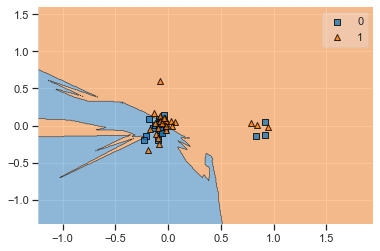

In [55]:
#KNN plot

X_b = X_train[100:150,[2,5]]
y_b = y_train[100:150]

knn = KNeighborsClassifier(11)
knn.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b.values, clf = knn)

### 5 b)  Logistic Regression with PCA

In [56]:
#running the Logistic Regression model

from sklearn.linear_model import LogisticRegression

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state = 1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
pca_alg = PCA(0.95)
X_train = pca_alg.fit_transform(X_train)

X_test = scaler.transform(X_test_org)

X_test = pca_alg.transform(X_test)
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv = 5, return_train_score = True, scoring = 'recall')

grid_search.fit(X_train, y_train)
print("Best Parameters: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Highest CrossVal score: 1.00


In [57]:
#running the cross-validation

score = cross_val_score(LogisticRegression(C = 0.001, penalty = 'l2'), X_train, y_train, cv = 5, scoring = 'recall')
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(LogisticRegression(C = 0.001, penalty = 'l2'), X_test, y_test, cv = 5, scoring = 'recall')
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

CrossVal score: [1. 1. 1. 1. 1.]
Avg CrossVal score: 1.00
CrossVal score: [1. 1. 1. 1. 1.]
Avg CrossVal score: 1.00


In [58]:
score = cross_val_score(LogisticRegression(C = 0.001, penalty = 'l2'), X_train, y_train, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(LogisticRegression(C = 0.001, penalty = 'l2'), X_test, y_test, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

CrossVal score: [0.53757225 0.53757225 0.53179191 0.53488372 0.53488372]
Avg CrossVal score: 0.54
CrossVal score: [0.51724138 0.51724138 0.51724138 0.52631579 0.50877193]
Avg CrossVal score: 0.52


In [59]:
#displaying the score function

lr = LogisticRegression( C = 0.001, penalty = 'l2').fit(X_train, y_train)
y_pred = lr.predict(pca_alg.transform(scaler.transform(X)))
score_func(y, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       540
           1       0.53      1.00      0.69       611

    accuracy                           0.53      1151
   macro avg       0.27      0.50      0.35      1151
weighted avg       0.28      0.53      0.37      1151



,0
confusion_matrix,"[[0, 540], [0, 611]]"
classification_report,precision recall f1-score ...


### 5 c)  Linear SVM with PCA

In [60]:
#running the Linear SVM model

from sklearn.svm import LinearSVC

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
pca_alg=PCA(0.95)
X_train=pca_alg.fit_transform(X_train)

X_test = scaler.transform(X_test_org)

X_test=pca_alg.transform(X_test)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(LinearSVC(), param_grid, cv = 2, return_train_score = True, scoring = 'recall')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10}
Highest CrossVal score: 0.65


In [61]:
#printing the score

lin_svm = LinearSVC( C = 10 )

lin_svm.fit( X_train, y_train )
print( lin_svm.score ( X_train, y_train ))
print( lin_svm.score ( X_test, y_test ))

0.6998841251448435
0.6840277777777778


In [62]:
#running the cross-validation

score = cross_val_score(LinearSVC(C = 10), X_train, y_train,cv = 10, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(LinearSVC(C = 10), X_test, y_test, cv = 10, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

Recall CrossVal score: [0.63829787 0.68085106 0.63043478 0.43478261 0.65217391 0.65217391
 0.65217391 0.76086957 0.56521739 0.65217391]
Avg CrossVal score: 0.63
Recall CrossVal score: [0.66666667 0.6        0.6        0.33333333 0.4        0.6
 0.33333333 0.8        0.4        0.57142857]
Avg CrossVal score: 0.53


In [63]:
score = cross_val_score(LinearSVC(C = 10), X_train, y_train, cv = 10)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(LinearSVC(C = 10), X_test, y_test, cv = 10)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

CrossVal score: [0.68965517 0.67816092 0.66666667 0.6744186  0.70930233 0.6744186
 0.68604651 0.74418605 0.6744186  0.69767442]
Avg CrossVal score: 0.69
CrossVal score: [0.72413793 0.65517241 0.65517241 0.4137931  0.65517241 0.68965517
 0.51724138 0.82758621 0.67857143 0.57142857]
Avg CrossVal score: 0.64


In [64]:
#displaying the score function

lin_svm = LinearSVC( C = 10 )

lin_svm.fit( X_train,y_train )
y_pred = lin_svm.predict( pca_alg.transform(scaler.transform(X)))
score_func(y, y_pred)

              precision    recall  f1-score   support

           0       0.65      0.72      0.68       540
           1       0.73      0.66      0.69       611

    accuracy                           0.69      1151
   macro avg       0.69      0.69      0.69      1151
weighted avg       0.69      0.69      0.69      1151



,0
confusion_matrix,"[[389, 151], [209, 402]]"
classification_report,precision recall f1-score ...


### 5 d)  Decision Tree with PCA

In [65]:
#running the Decision Tree model

from sklearn.tree import DecisionTreeClassifier

X = sample_data[['quality assessment', 'pre_screening', 'MA_0.5', 'MA_0.6', 'MA_0.7', 'MA_0.8', 'MA_0.9', 'MA_1.0', 'MA_0.5P', 'MA_0.6P', 'MA_0.7P', 'MA_0.8P', 'MA_0.9P', 'MA_1.0', 'MA_1.1', 'MA_1.2', 'euclidean distance', 'diameter of the optic', 'AM/FM']]
y = sample_data['Class']

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
pca_alg = PCA(0.95)
X_train = pca_alg.fit_transform(X_train)

X_test = scaler.transform(X_test_org)

X_test=pca_alg.transform(X_test)
param_grid = {'max_depth': [4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]}
grid_search = GridSearchCV( DecisionTreeClassifier(), param_grid, cv = 5, return_train_score = True, scoring='recall')
grid_search.fit(X_train, y_train)
print("Best parameter: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best parameter: {'max_depth': 18}
Highest CrossVal score: 0.57


In [66]:
#fixing the max_depth at 15 as the above formula gives best parameters in the range of 15-18.
#the cross-validation score is in the range of 0.64-0.68.

dtree = DecisionTreeClassifier(max_depth = 18, random_state = 1)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.583


In [67]:
#running cross-validation

score = cross_val_score(dtree, X_train, y_train, cv = 5, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(dtree, X_test, y_test, cv = 5, scoring = 'recall')
print(" Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

Recall CrossVal score: [0.60215054 0.5483871  0.56521739 0.55434783 0.55434783]
Avg CrossVal score: 0.56
 Recall CrossVal score: [0.7        0.6        0.8        0.4        0.62068966]
Avg CrossVal score: 0.62


In [68]:
score = cross_val_score(dtree, X_train, y_train, cv = 5)
print("Accuracy CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(dtree, X_test, y_test, cv = 5)
print("Accuracy CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

Accuracy CrossVal score: [0.61271676 0.53757225 0.53757225 0.51744186 0.55232558]
Avg CrossVal score: 0.55
Accuracy CrossVal score: [0.5862069  0.55172414 0.65517241 0.50877193 0.59649123]
Avg CrossVal score: 0.58


In [69]:
#depicting the score function 

y_pred = dtree.predict(pca_alg.transform(scaler.transform(X)))
score_func(y, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       540
           1       0.89      0.90      0.90       611

    accuracy                           0.89      1151
   macro avg       0.89      0.89      0.89      1151
weighted avg       0.89      0.89      0.89      1151



,0
confusion_matrix,"[[475, 65], [59, 552]]"
classification_report,precision recall f1-score ...


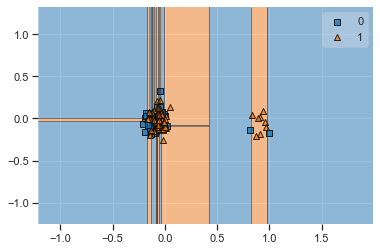

In [70]:
#Decision tree plot

X_b =  X_train[:100,[2,5]]
y_b = y_train[:100]

dtree = DecisionTreeClassifier(max_depth = 15)
dtree.fit(X_b, y_b)

plot_decision_regions(X_b, y_b.values, clf = dtree)

### 5 e) Kernelized SVM - rbf with PCA

In [71]:
#running the kernelized svm - rbf model

from sklearn.svm import SVC

param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, .1, 10, 100]}

grid_search = GridSearchCV( SVC ( kernel = 'rbf'), param_grid, return_train_score = True, cv = 5, scoring = 'recall')

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
pca_alg = PCA(0.95)
X_train = pca_alg.fit_transform(X_train)

X_test = scaler.transform(X_test_org)

X_test = pca_alg.transform(X_test)
grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best Parameter: {'C': 0.001, 'gamma': 0.001}
Highest CrossVal score: 1.00


In [72]:
#running cross-validation

score = cross_val_score(SVC (C = 0.001, kernel = 'rbf', gamma = 0.001), X_train, y_train,cv = 5, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(SVC (C = 0.001, kernel = 'rbf', gamma = 0.001), X_test, y_test, cv = 5, scoring = 'recall')
print(" Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

Recall CrossVal score: [1. 1. 1. 1. 1.]
Avg CrossVal score: 1.00
 Recall CrossVal score: [1. 1. 1. 1. 1.]
Avg CrossVal score: 1.00


In [73]:
score = cross_val_score(SVC (C = 0.001, kernel = 'rbf', gamma = 0.001), X_train, y_train, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(SVC (C = 0.001, kernel = 'rbf', gamma = 0.001), X_test, y_test, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

CrossVal score: [0.53757225 0.53757225 0.53179191 0.53488372 0.53488372]
Avg CrossVal score: 0.54
CrossVal score: [0.51724138 0.51724138 0.51724138 0.52631579 0.50877193]
Avg CrossVal score: 0.52


In [74]:
#depicting the score function

svm_rbf = SVC(C = 0.001, kernel = 'rbf', gamma = 0.001)
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict( pca_alg.transform(scaler.transform(X)))
score_func(y, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       540
           1       0.53      1.00      0.69       611

    accuracy                           0.53      1151
   macro avg       0.27      0.50      0.35      1151
weighted avg       0.28      0.53      0.37      1151



,0
confusion_matrix,"[[0, 540], [0, 611]]"
classification_report,precision recall f1-score ...


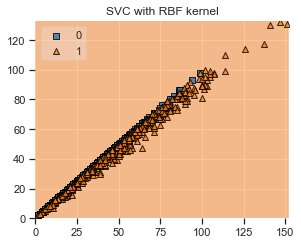

In [75]:
#kernelized svm- rbf plot

%matplotlib inline

import matplotlib.gridspec as gridspec
import itertools

X = sample_data[['MA_0.5', 'MA_0.6']]
y = sample_data['Class']

C = 0.001
clf = SVC ( kernel = 'rbf', gamma = 0.001, C = C)

gs = gridspec.GridSpec( 2, 2 )
fig = plt.figure(figsize = (10, 8))

labels = ['SVC with RBF kernel']

for clf, lab, grd in zip([clf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs [grd[0], grd[1]])
    fig = plot_decision_regions(X = X.values, y = y.values,
                                clf = clf, legend = 2)
    plt.title(lab)

### 5 f) Kernelized SVM - poly method with PCA

In [76]:
#running the kernelized svm - poly model 

from sklearn.svm import SVC

param_grid = {'gamma': [0.01, 0.1, 1], 'C': [ 1, 10, 100], 'degree': [1, 2, 3]}

grid_search = GridSearchCV( SVC ( kernel = 'poly'), param_grid, return_train_score = True, cv = 5, scoring = 'recall')

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
pca_alg=PCA(0.95)
X_train=pca_alg.fit_transform(X_train)

X_test = scaler.transform(X_test_org)

X_test=pca_alg.transform(X_test)
grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Highest Score {:.2f}".format(grid_search.best_score_))

Best Parameter: {'C': 1, 'degree': 2, 'gamma': 0.01}
Highest Score 1.00


In [77]:
#running the cross-validation

score = cross_val_score( SVC ( kernel = 'poly', gamma = 0.01, C = 1, degree = 2), X_train, y_train, cv = 5, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score( SVC ( kernel = 'poly', gamma = 0.01, C = 1, degree = 2), X_test, y_test,cv = 5, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

Recall CrossVal score: [1. 1. 1. 1. 1.]
Avg CrossVal score: 1.00
Recall CrossVal score: [1. 1. 1. 1. 1.]
Avg CrossVal score: 1.00


In [78]:
score = cross_val_score( SVC ( kernel = 'poly', gamma = 0.01, C = 1, degree = 2), X_train, y_train, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score( SVC ( kernel = 'poly', gamma = 0.01, C = 1, degree = 2), X_test, y_test, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

CrossVal score: [0.53757225 0.53757225 0.53179191 0.53488372 0.53488372]
Avg CrossVal score: 0.54
CrossVal score: [0.51724138 0.51724138 0.51724138 0.52631579 0.50877193]
Avg CrossVal score: 0.52


In [79]:
#depicting the score function

svm_poly = SVC (kernel = 'poly', gamma = 0.01, C = 1, degree = 2)
svm_poly.fit(X_train,y_train)

y_pred = svm_poly.predict(pca_alg.transform(scaler.transform(X)))
score_func(y, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       540
           1       0.53      1.00      0.69       611

    accuracy                           0.53      1151
   macro avg       0.27      0.50      0.35      1151
weighted avg       0.28      0.53      0.37      1151



,0
confusion_matrix,"[[0, 540], [0, 611]]"
classification_report,precision recall f1-score ...


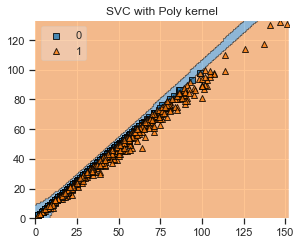

In [80]:
#kernelized svm - poly model 

%matplotlib inline

import matplotlib.gridspec as gridspec
import itertools

X = sample_data[['MA_0.5', 'MA_0.6']]
y = sample_data['Class']

C = 1
clf = SVC ( kernel = 'poly', gamma = 0.01, C = C)

gs = gridspec.GridSpec( 2, 2 )
fig = plt.figure(figsize = (10, 8))

labels = ['SVC with Poly kernel']

for clf, lab, grd in zip([clf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs [grd[0], grd[1]])
    fig = plot_decision_regions(X = X.values, y = y.values,
                                clf = clf, legend = 2)
    plt.title(lab)

### 5 g) Kernelized SVM - linear Model with PCA

In [81]:
#running the kernelized svm - linear model 

from sklearn.svm import SVC

param_grid = {'gamma': [0.01, 0.1, 1, 10], 'C': [0.01, 0.1, 1, 10]}

grid_search = GridSearchCV( SVC( kernel = 'linear'), param_grid, return_train_score = True, cv = 5, scoring = 'recall')

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
pca_alg=PCA(0.95)
X_train=pca_alg.fit_transform(X_train)

X_test = scaler.transform(X_test_org)

X_test=pca_alg.transform(X_test)

grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best Parameter: {'C': 1, 'gamma': 0.01}
Highest CrossVal score: 0.58


In [82]:
#running the cross-validation

score = cross_val_score( SVC (kernel = 'linear', C = 0.1, gamma = 0.01), X_train, y_train, cv = 5, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(SVC (kernel = 'linear', C = 0.1, gamma = 0.01), X_test, y_test, cv = 5, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

Recall CrossVal score: [0.6344086  0.62365591 0.5326087  0.65217391 0.4673913 ]
Avg CrossVal score: 0.58
Recall CrossVal score: [0.5        0.6        0.46666667 0.46666667 0.5862069 ]
Avg CrossVal score: 0.52


In [83]:
score = cross_val_score(SVC ( kernel = 'linear', C = 0.1, gamma = 0.01), X_train, y_train, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(SVC ( kernel = 'linear', C = 0.1, gamma = 0.01), X_test, y_test, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

CrossVal score: [0.65895954 0.60693642 0.5433526  0.62790698 0.55232558]
Avg CrossVal score: 0.60
CrossVal score: [0.53448276 0.60344828 0.55172414 0.47368421 0.66666667]
Avg CrossVal score: 0.57


In [84]:
#depicting the score function

svm_linear = SVC(kernel = 'linear', C = 0.1, gamma = 0.01)
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(pca_alg.transform(scaler.transform(X)))
score_func(y, y_pred)

              precision    recall  f1-score   support

           0       0.56      0.61      0.58       540
           1       0.62      0.58      0.60       611

    accuracy                           0.59      1151
   macro avg       0.59      0.59      0.59      1151
weighted avg       0.59      0.59      0.59      1151



,0
confusion_matrix,"[[328, 212], [258, 353]]"
classification_report,precision recall f1-score ...


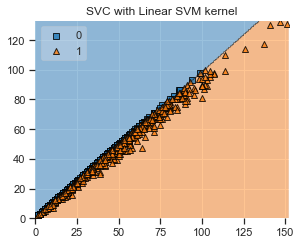

In [85]:
#kernelized svm - linear model 

%matplotlib inline

import matplotlib.gridspec as gridspec
import itertools

X = sample_data[['MA_0.5', 'MA_0.6']]
y = sample_data['Class']

C = 0.1
clf = SVC ( kernel = 'linear', gamma = 0.01, C = C)

gs = gridspec.GridSpec( 2, 2 )
fig = plt.figure(figsize = (10, 8))

labels = ['SVC with Linear SVM kernel']

for clf, lab, grd in zip([clf],
                         labels,
                         itertools.product([0, 1],
                         repeat = 2)):
    clf.fit(X, y)
    ax = plt.subplot(gs [grd[0], grd[1]])
    fig = plot_decision_regions(X = X.values, y = y.values,
                                clf = clf, legend = 2)
    plt.title(lab)

### 5 h) Comparing the PCA and without PCA results of the models

#### Showcasing data for models after applying PCA

In [86]:
#calling the with pca report document

classification_report_with_pca = pd.read_csv('classification_with_pca_Report.csv')
classification_report_with_pca.set_index("Model",inplace=True)
classification_report_with_pca.head((8))


,Best Parameter,Training Score,CV SCORE,testing score,f1 score,recall
Model,,,,,,
KNN Classification,{'n_neighbors': 11},0.65,0.68,0.67,0.66,0.66
Logistic Regression,"{'C': 0.001, 'penalty': 'l2'}",0.59,1.00,0.56,0.58,0.60
Linear SVM,{'C': 10},0.68,0.67,0.69,0.69,0.69
Decision Tree,{'max_depth': 18},1.00,0.62,0.54,0.88,0.88
Kernelized SVM - rbf,"{'C': 0.001, 'gamma': 0.001}",0.52,1.00,0.56,0.37,0.52
Kernelized SVM - poly,"{'C': 1, 'degree': 2, 'gamma': 0.01}",0.52,1.00,0.56,0.37,0.52
Kernelized SVM - linear,"{'C': 0.1, 'gamma': 0.01}",0.59,0.60,0.60,0.59,0.59


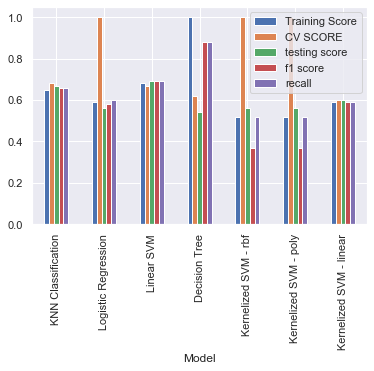

In [87]:
#generating a bar chart visualization of the different scores for the models mentioned in the report

classification_report_with_pca[['Training Score', 'CV SCORE','testing score', 'f1 score', 'recall']].plot(kind='bar')

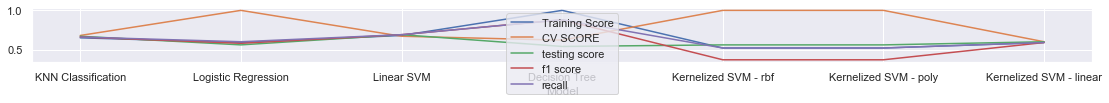

In [88]:
#generating a Line chart  visualization of the different scores for the models mentioned in the report

classification_report_with_pca[['Training Score', 'CV SCORE','testing score', 'f1 score', 'recall']].plot(kind='line',figsize=(19, 1))

#### Showcasing data for models without applying PCA

In [89]:
#importing the classification report.csv file built to showcasethe results of all the models without applying PCA
#calling out the report of models without applying PCA 

classification_report_without_pca = pd.read_csv('classification_without_pca_report.csv')
classification_report_without_pca.set_index("Model",inplace=True)
classification_report_without_pca.head((8))

,Best Parameter,Training Score,CV SCORE,testing score,f1 score,recall
Model,,,,,,
KNN Classification,{'n_neighbors': 13},0.65,0.68,0.67,0.67,0.67
Logistic Regression,"{'C': 0.001, 'penalty': 'l2'}",0.52,1.00,0.56,0.37,0.53
Linear SVM,{'C': 100},0.72,0.69,0.71,0.71,0.71
Decision Tree,{'max_depth': 14},0.91,0.65,0.60,0.84,0.84
Kernelized SVM - rbf,"{'C': 0.001, 'gamma': 0.001}",0.52,1.00,0.56,0.37,0.53
Kernelized SVM - poly,"{'C': 1, 'degree': 2, 'gamma': 0.01}",0.52,1.00,0.56,0.37,0.53
Kernelized SVM - linear,"{'C': 0.1, 'gamma': 0.01}",0.60,0.61,0.61,0.60,0.60


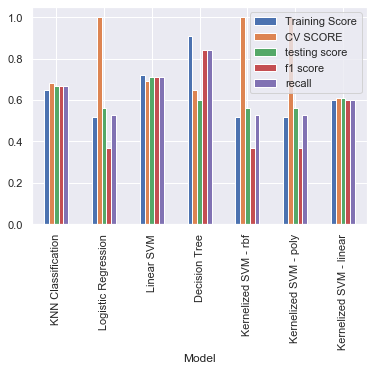

In [90]:
#generating a bar chart visualization of the different scores 
#for the models mentioned in the report

classification_report_without_pca[['Training Score', 'CV SCORE','testing score', 'f1 score', 'recall']].plot(kind='bar')

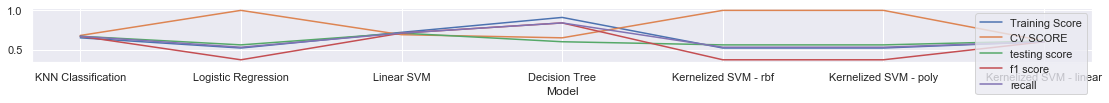

In [91]:
#generating a Line chart  visualization of the different scores for the models mentioned in the report

classification_report_without_pca[['Training Score', 'CV SCORE','testing score', 'f1 score', 'recall']].plot(kind='line',figsize=(19, 1))

# Decision: Output of models like Linear SVM, Decision Tree and Kernalized SVM-linear are much better without PCA. Models like Logistic Regression and KNN Classification show improvements with the application of PCA.

## Applying the Deep Learning models

In [92]:
# importing the required libraries

import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow

Using TensorFlow backend.


In [94]:
#splitting and scaling the dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = sample_data[['quality assessment', 'pre_screening', 'MA_0.5', 'MA_0.6', 'MA_0.7', 'MA_0.8', 'MA_0.9', 'MA_1.0', 'MA_0.5P', 'MA_0.6P', 'MA_0.7P', 'MA_0.8P', 'MA_0.9P', 'MA_1.0', 'MA_1.1', 'MA_1.2', 'euclidean distance', 'diameter of the optic', 'AM/FM']]
y = sample_data['Class']

X_train_org, X_test_org, y_train, y_test = train_test_split (X, y, test_size = .25, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [120]:
#creating the model to apply GridSearchCV and calculate the 
#best parameter values

def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim = 19, activation = 'relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    #compile model
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model
np.random.seed(10)
model = KerasClassifier(build_fn = create_model, verbose = 0)
param_grid = {'batch_size':[10, 20, 30] , 'epochs':[100, 150, 200]}
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid_search_result = grid_search.fit(X_train,y_train)
print("Best Parameter: {}".format(grid_search_result.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search_result.best_score_))

Best Parameter: {'batch_size': 20, 'epochs': 200}
Highest CrossVal score: 0.72


In [122]:
#fitting the model 

model.fit(X_train, y_train, epochs = 200, batch_size = 20)

Epoch 1/200
863/863 [==============================] - 0s 283us/step - loss: 0.7112 - accuracy: 0.5226
Epoch 2/200
863/863 [==============================] - 0s 48us/step - loss: 0.6867 - accuracy: 0.5238
Epoch 3/200
863/863 [==============================] - 0s 66us/step - loss: 0.6751 - accuracy: 0.5261
Epoch 4/200
863/863 [==============================] - 0s 64us/step - loss: 0.6637 - accuracy: 0.5411
Epoch 5/200
863/863 [==============================] - 0s 50us/step - loss: 0.6559 - accuracy: 0.5724
Epoch 6/200
863/863 [==============================] - 0s 80us/step - loss: 0.6499 - accuracy: 0.6188
Epoch 7/200
863/863 [==============================] - 0s 56us/step - loss: 0.6470 - accuracy: 0.6338
Epoch 8/200
863/863 [==============================] - 0s 78us/step - loss: 0.6436 - accuracy: 0.6408
Epoch 9/200
863/863 [==============================] - 0s 105us/step - loss: 0.6391 - accuracy: 0.6419
Epoch 10/200
863/863 [==============================] - 0s 107us/step - loss: 0.

863/863 [==============================] - 0s 97us/step - loss: 0.4791 - accuracy: 0.7555
Epoch 159/200
863/863 [==============================] - 0s 94us/step - loss: 0.4785 - accuracy: 0.7543
Epoch 160/200
863/863 [==============================] - 0s 103us/step - loss: 0.4824 - accuracy: 0.7659
Epoch 161/200
863/863 [==============================] - 0s 98us/step - loss: 0.4826 - accuracy: 0.7555
Epoch 162/200
863/863 [==============================] - 0s 124us/step - loss: 0.4788 - accuracy: 0.7532
Epoch 163/200
863/863 [==============================] - 0s 124us/step - loss: 0.4771 - accuracy: 0.7590
Epoch 164/200
863/863 [==============================] - 0s 132us/step - loss: 0.4761 - accuracy: 0.7683
Epoch 165/200
863/863 [==============================] - 0s 124us/step - loss: 0.4734 - accuracy: 0.7636
Epoch 166/200
863/863 [==============================] - 0s 97us/step - loss: 0.4744 - accuracy: 0.7636
Epoch 167/200
863/863 [==============================] - 0s 83us/step - l

In [123]:
# evaluating the model

score_1 = model.evaluate(X_train, y_train)
print("train accuracy \n%s: %.2f%%" % (model.metrics_names[1], score_1[1]*100))

scores = model.evaluate(X_test, y_test)
print("test accuracy \n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

863/863 [==============================] - 0s 67us/step
train accuracy 
accuracy: 76.71%
288/288 [==============================] - 0s 27us/step
test accuracy 
accuracy: 70.83%


In [124]:
#calling out the score function

score_func(y_test,model.predict(X_test).round())

              precision    recall  f1-score   support

           0       0.63      0.83      0.72       128
           1       0.82      0.61      0.70       160

    accuracy                           0.71       288
   macro avg       0.72      0.72      0.71       288
weighted avg       0.73      0.71      0.71       288



,0
confusion_matrix,"[[106, 22], [62, 98]]"
classification_report,precision recall f1-score ...


In [95]:
#reducing the dimensionality to 2 dimensions using the best
#hyper parameter values

X_b = X_train[100:150, [2,5]]
y_b = y_train[100:150]
model = Sequential()
model.add(Dense(12, input_dim = 2, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
# Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])
model.fit(X_b, y_b,epochs = 200, batch_size = 20) 






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/200
50/50 [==============================] - 0s 5ms/step - loss: 0.7159 - acc: 0.3200
Epoch 2/200
50/50 [==============================] - 0s 120us/step - loss: 0.7126 - acc: 0.3200
Epoch 3/200
50/50 [==============================] - 0s 100us/step - loss: 0.7091 - acc: 0.3400
Epoch 4/200
50/50 [==============================] - 0s 120us/step - loss: 0.7054 - acc: 0.3600
Epoch 5/200
50/50 [==============================] - 0s 160us/step - loss: 0.7026 - acc: 0.4600
Epoch 6/200
50/50 [==============================] - 0s 120us/step - loss: 0.7001 - acc: 0.4800
Epoch 7/200
50/50 [==============================] - 0s 140us/step - loss: 0.6970 - acc: 0.5000
Epoch 8/200
50/50 [==============================] - 0s 100us/step - loss: 0.6948 - acc: 0.5000
Epoch 9/200
50/5

50/50 [==============================] - 0s 160us/step - loss: 0.5956 - acc: 0.7200
Epoch 67/200
50/50 [==============================] - 0s 120us/step - loss: 0.5950 - acc: 0.7200
Epoch 68/200
50/50 [==============================] - 0s 140us/step - loss: 0.5946 - acc: 0.7200
Epoch 69/200
50/50 [==============================] - 0s 160us/step - loss: 0.5943 - acc: 0.7200
Epoch 70/200
50/50 [==============================] - 0s 140us/step - loss: 0.5938 - acc: 0.7200
Epoch 71/200
50/50 [==============================] - 0s 160us/step - loss: 0.5933 - acc: 0.7200
Epoch 72/200
50/50 [==============================] - 0s 140us/step - loss: 0.5930 - acc: 0.7200
Epoch 73/200
50/50 [==============================] - 0s 140us/step - loss: 0.5926 - acc: 0.7200
Epoch 74/200
50/50 [==============================] - 0s 120us/step - loss: 0.5923 - acc: 0.7200
Epoch 75/200
50/50 [==============================] - 0s 120us/step - loss: 0.5918 - acc: 0.7200
Epoch 76/200
50/50 [=======================

50/50 [==============================] - 0s 120us/step - loss: 0.5775 - acc: 0.7200
Epoch 150/200
50/50 [==============================] - 0s 160us/step - loss: 0.5773 - acc: 0.7200
Epoch 151/200
50/50 [==============================] - 0s 160us/step - loss: 0.5774 - acc: 0.7200
Epoch 152/200
50/50 [==============================] - 0s 120us/step - loss: 0.5771 - acc: 0.7200
Epoch 153/200
50/50 [==============================] - 0s 140us/step - loss: 0.5769 - acc: 0.7200
Epoch 154/200
50/50 [==============================] - 0s 160us/step - loss: 0.5768 - acc: 0.7200
Epoch 155/200
50/50 [==============================] - 0s 120us/step - loss: 0.5767 - acc: 0.7200
Epoch 156/200
50/50 [==============================] - 0s 160us/step - loss: 0.5766 - acc: 0.7200
Epoch 157/200
50/50 [==============================] - 0s 140us/step - loss: 0.5765 - acc: 0.7200
Epoch 158/200
50/50 [==============================] - 0s 160us/step - loss: 0.5764 - acc: 0.7200
Epoch 159/200
50/50 [=============